In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import os
if "notebooks" in os.getcwd():
    os.chdir("..") 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
train_df = pd.read_csv("data/train.csv")

In [15]:
labels = train_df["label"]

In [22]:
pixels = [pixel for pixel in train_df.columns if not "label" in pixel]

In [66]:
feature_array = train_df[pixels].values.reshape(42000, 28, 28)
feature_array = feature_array/255

In [67]:
(labels.values).shape

(42000,)

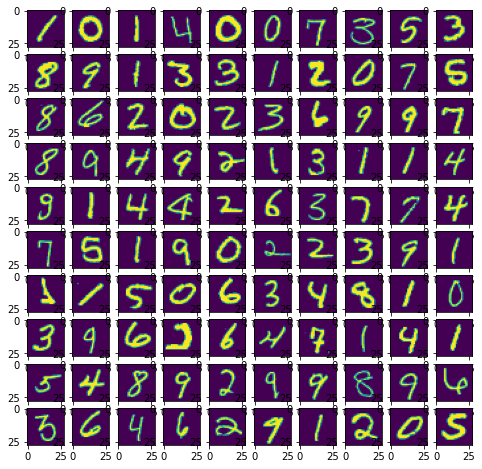

In [56]:
fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(feature_array[i]/256)

In [68]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10)
])

In [71]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [70]:
model.fit(feature_array, labels)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.